# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Ученая степень', 'Высшее', 'Среднее специальное', 'Неполное среднее', 'Два и более высших образования', 'Неоконченное высшее', 'Среднее'}


MARITAL_STATUS
{'Не состоял в браке', 'Разведен(а)', 'Гражданский брак', 'Состою в браке', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Нефтегазовая промышленность', 'Другие сферы', 'Маркетинг', 'Информационные услуги', 'ЧОП/Детективная д-ть', 'Сельское хозяйство', 'Коммунальное хоз-во/Дорожные службы', 'Торговля', 'Наука', 'Салоны красоты и здоровья', 'Страхование', 'Туризм', 'Здравоохранение', 'Образование', 'Энергетика', 'Химия/Парфюмерия/Фармацевтика', 'Транспорт', 'Металлургия/Промышленность/Машиностроение', 'Строительство', 'СМИ/Реклама/PR-агенства', 'Юридические услуги/нотариальные услуги', 'Логистика', 'Сборочные производства', 'Подбор персонала', 'Государственная служба', 'Управляющая компания', 'Ресторанный бизнес/Общественное питание', 'Развлечения/Искусство', 'Недвижимость', 'Банк/Финансы', 'Информационные технологии'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
# Проверим в каких полях есть пропуски
for i in df_train.columns: # перебираем все столбцы
    missed_values=len(df_train[df_train[i].isnull()])
    if missed_values>0: # если есть пустые
        values_num=len(df_train[i].unique())
        print(i, '\t', missed_values, '{:.1%}'.format(missed_values/len(df_train)), 'пропуск(а/ов)', '\t', values_num, 'разных значений') # выводим название столбца

GEN_INDUSTRY 	 1367 9.0% пропуск(а/ов) 	 32 разных значений
GEN_TITLE 	 1367 9.0% пропуск(а/ов) 	 13 разных значений
ORG_TP_STATE 	 1367 9.0% пропуск(а/ов) 	 6 разных значений
ORG_TP_FCAPITAL 	 1365 9.0% пропуск(а/ов) 	 3 разных значений
JOB_DIR 	 1367 9.0% пропуск(а/ов) 	 11 разных значений
TP_PROVINCE 	 295 1.9% пропуск(а/ов) 	 71 разных значений
REGION_NM 	 1 0.0% пропуск(а/ов) 	 12 разных значений
WORK_TIME 	 1368 9.0% пропуск(а/ов) 	 303 разных значений
PREVIOUS_CARD_NUM_UTILIZED 	 14935 98.1% пропуск(а/ов) 	 3 разных значений


In [ ]:
"""
Варианты работы с пропусками:

для категориальных признаков
        - или проигнорировать (при OneHotEncoding получим равные нулю для дамми-признаки)
        - или заменить на моду (нужно смотреть на распределение - есть ли какое-то явно доминирующее значение)

для метрических признаков
        - заменить средней, медианой

+ дополнительно посмотреть, если пропуски касаются одних и тех же наблюдений - проигнорировать все наблюдение 

Если же очень много пропусков - можно проигнорировать признак, но снова же - смотреть внимательно:
можно приравнять нулю, минус единице..., и если признак будет иметь хорошую предсказательную способность - игнорировать его нельзя 

""" 
    

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
"""
Есть, т.к. выше уже смотрели на данные и имеем признаки:

    EDUCATION                     
    MARITAL_STATUS                
    GEN_INDUSTRY                  
    GEN_TITLE                     
    ORG_TP_STATE                  
    ORG_TP_FCAPITAL               
    JOB_DIR                       
    FAMILY_INCOME                              
    REG_ADDRESS_PROVINCE          
    FACT_ADDRESS_PROVINCE         
    POSTAL_ADDRESS_PROVINCE       
    TP_PROVINCE                   
    REGION_NM      
    
Общее действие - One-Hot-Encoding и генерация дамми-переменных
    
    Но нужно смотреть на природу каждого признака, количество уникальных значений. 
Так, например, если будем использовать адрес, то модель может легко переобучиться на примере одного клиента, 
и мы можем просто не получить в тестовой или уже "боевой" выборке клиента с точно таким же адресом.

"""

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [16]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    ## Your Code Here

    # Удаляем идентификатор 
    df_output.drop(['AGREEMENT_RK'], axis=1, inplace=True)

    # Исправляем ошибки чтения десятичного разделителя
    for col in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
        df_output[col]=df_output[col].map(lambda x: x.replace(',', '.')).astype('float')

    # заполняем пропуски
    for col in df_output.columns: # перебираем все столбцы

        missed_values=len(df_output[df_output[col].isnull()]) # считаем количество null-значений

        if missed_values>0: # если есть таковые

            if str(df_output[col].dtype) == 'object': #если категориальная - заполняем пустой строкой
                df_output[col][df_output[col].isnull()]='пусто'

            else: # если не категориальная - медианой
                df_output[col][df_output[col].isnull()]=df_output[col][~df_output[col].isnull()].median()


    # определяем категориальные признаки
    cat_features=[col for col in df_output.columns if str(df_output[col].dtype) == 'object']
    cat_features.remove('sample') # исключаем признак выборки

    # "приклеиваем" дамми-признаки столюцами справа
    df_output=pd.concat([df_output, pd.get_dummies(df_output[cat_features])], axis=1)
    # удаляем исходный категориальные признаки
    df_output.drop(cat_features, axis=1, inplace=True)
    
    return df_output

In [17]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

C:\Users\prikhno.k\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\prikhno.k\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [18]:
y, y_test = df_train_preproc['TARGET'], df_test_preproc['TARGET']
X, X_test = df_train_preproc.drop(['TARGET'], axis=1), df_test_preproc.drop(['TARGET'], axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [19]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
# разбиваем выборку на обучающую и контрольную
y_train, y_control, X_train, X_control=train_test_split(y, X, test_size=0.3, random_state=42)

C:\Users\prikhno.k\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
clf_1=DecisionTreeClassifier()
clf_2=RandomForestClassifier()
clf_3=LogisticRegression()

clf_1.fit(X_train, y_train)
clf_2.fit(X_train, y_train)
clf_3.fit(X_train, y_train)

y_pred_1, y_pred_proba_1=clf_1.predict(X_control), clf_1.predict_proba(X_control)[:,1]
y_pred_2, y_pred_proba_2=clf_2.predict(X_control), clf_2.predict_proba(X_control)[:,1]
y_pred_3, y_pred_proba_3=clf_3.predict(X_control), clf_3.predict_proba(X_control)[:,1]

In [21]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print('(1) DecisionTreeClassifier: '+
      ' accuracy='+'{:.1%}'.format(accuracy_score(y_control, y_pred_1))+
      ' |  precision='+'{:.1%}'.format(precision_score(y_control, y_pred_1))+
      ' |  recall='+'{:.1%}'.format(recall_score(y_control, y_pred_1)))

print('(2) RandomForestClassifier: '+
      ' accuracy='+'{:.1%}'.format(accuracy_score(y_control, y_pred_2))+
      ' |  precision='+'{:.1%}'.format(precision_score(y_control, y_pred_2))+
      ' |  recall='+'{:.1%}'.format(recall_score(y_control, y_pred_2)))

print('(3) LogisticRegression: '+
      ' accuracy='+'{:.1%}'.format(accuracy_score(y_control, y_pred_3))+
      ' |  precision='+'{:.1%}'.format(precision_score(y_control, y_pred_3))+
      ' |  recall='+'{:.1%}'.format(recall_score(y_control, y_pred_3)))

(1) DecisionTreeClassifier:  accuracy=79.4% |  precision=17.0% |  recall=17.8%
(2) RandomForestClassifier:  accuracy=87.6% |  precision=16.7% |  recall=0.5%
(3) LogisticRegression:  accuracy=87.8% |  precision=28.6% |  recall=0.4%


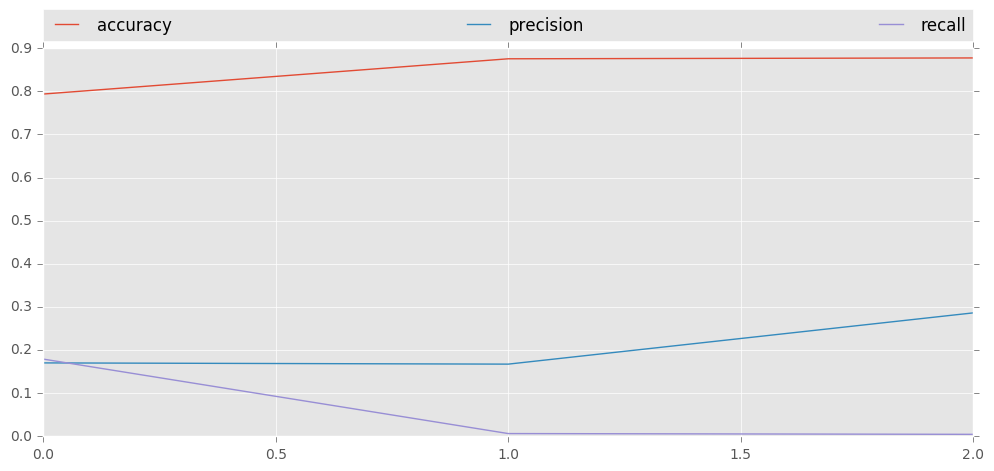

In [22]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here
plt.plot([accuracy_score(y_control, y_pred_1), accuracy_score(y_control, y_pred_2), accuracy_score(y_control, y_pred_3)], label='accuracy')
plt.plot([precision_score(y_control, y_pred_1), precision_score(y_control, y_pred_2), precision_score(y_control, y_pred_3)], label='precision')
plt.plot([recall_score(y_control, y_pred_1), recall_score(y_control, y_pred_2), recall_score(y_control, y_pred_3)], label='recall')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)

(1) DecisionTreeClassifier:  roc_auc_score=0.5287
(2) RandomForestClassifier:  roc_auc_score=0.5824
(3) LogisticRegression:  roc_auc_score=0.6372


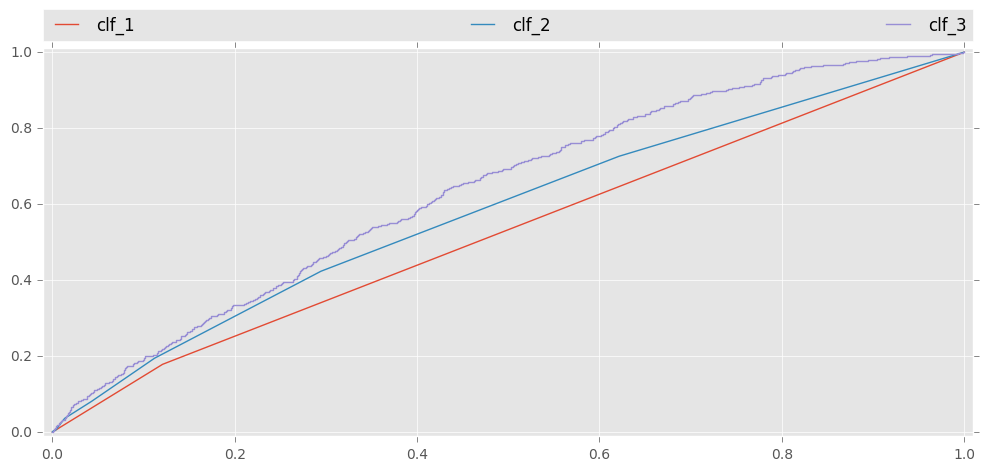

In [23]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here
from sklearn.metrics import roc_auc_score, roc_curve

print('(1) DecisionTreeClassifier: '+
      ' roc_auc_score='+'{:.4}'.format(roc_auc_score(y_control, y_pred_proba_1)))

print('(2) RandomForestClassifier: '+
      ' roc_auc_score='+'{:.4}'.format(roc_auc_score(y_control, y_pred_proba_2)))

print('(3) LogisticRegression: '+
      ' roc_auc_score='+'{:.4}'.format(roc_auc_score(y_control, y_pred_proba_3)))


plt.figure()
plt.title='ROC curves'
plt.grid=True
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.xlabel='fpr'
plt.ylabel='tpr'

fpr, tpr, thresholds=roc_curve(y_control, y_pred_proba_1)
plt.plot(fpr, tpr, label='clf_1')

fpr, tpr, thresholds=roc_curve(y_control, y_pred_proba_2)
plt.plot(fpr, tpr, label='clf_2')

fpr, tpr, thresholds=roc_curve(y_control, y_pred_proba_3)
plt.plot(fpr, tpr, label='clf_3')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)


In [24]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here
cv1=cross_val_score(estimator=clf_1, X=X, y=y, cv=10, scoring='roc_auc').mean()
cv2=cross_val_score(estimator=clf_2, X=X, y=y, cv=10, scoring='roc_auc').mean()
cv3=cross_val_score(estimator=clf_3, X=X, y=y, cv=10, scoring='roc_auc').mean()

print('(1) DecisionTreeClassifier: '+
      ' mean CV roc_auc_score='+'{:.4}'.format(cv1))

print('(2) RandomForestClassifier: '+
      ' mean CV roc_auc_score='+'{:.4}'.format(cv2))

print('(3) LogisticRegression: '+
      ' mean CV roc_auc_score='+'{:.4}'.format(cv3))

(1) DecisionTreeClassifier:  mean CV roc_auc_score=0.5256
(2) RandomForestClassifier:  mean CV roc_auc_score=0.5842
(3) LogisticRegression:  mean CV roc_auc_score=0.6462


In [25]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

## Your Code Here
# Лучшей определили модель №3 !!!
predict = clf_3.predict_proba(X_test)[:,1]

ROC AUC = 0.62


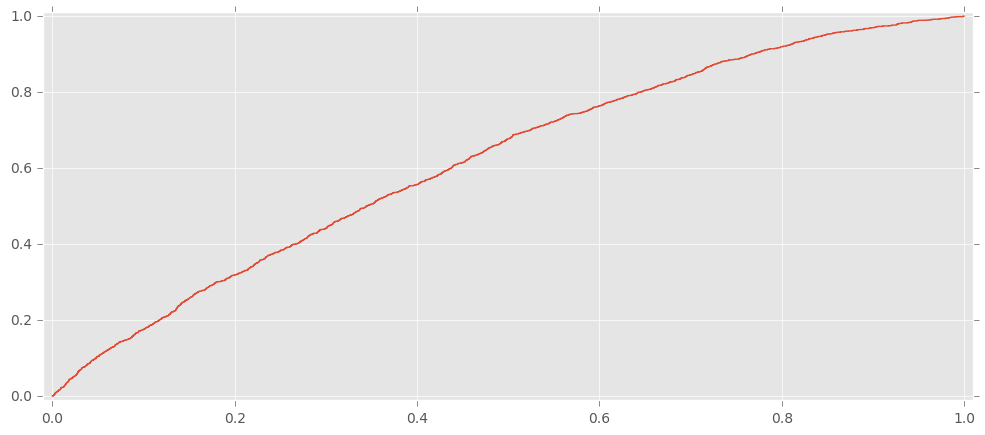

In [26]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here
print('ROC AUC = '+'{:.4}'.format(roc_auc_score(y_test, predict)))

plt.figure()
plt.title='ROC curves'
plt.grid=True
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.xlabel='fpr'
plt.ylabel='tpr'

fpr, tpr, thresholds=roc_curve(y_test, predict)
plt.plot(fpr, tpr)

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [27]:
### И далее ;)

# Сори, не успеваю...